# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [103]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combine_data = pd.merge(study_results, mouse_metadata, how = 'left', on = 'Mouse ID')

# Display the data table for preview
combine_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [104]:
# Checking the number of mice.
mice_data = combine_data['Mouse ID'].unique()
number_of_mice = len(mice_data)
number_of_mice

249

In [105]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = combine_data.loc[combine_data.duplicated(subset = ['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
#[combine_data[['Mouse ID', 'Timepoint']].duplicated() == True]
#duplicate_mice_id = duplicate_mice['Mouse ID'].unique()
duplicate_mice_id

array(['g989'], dtype=object)

In [106]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data = combine_data.loc[combine_data['Mouse ID'] == 'g989', :]
duplicate_mice_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [107]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_combine_data = combine_data[combine_data['Mouse ID'].isin(duplicate_mice) == False]
clean_combine_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [108]:
# Checking the number of mice in the clean DataFrame.
clean_mice_data = clean_combine_data['Mouse ID'].nunique()
clean_mice_data

248

## Summary Statistics

In [109]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

drug_regimen_data = clean_combine_data.set_index(['Drug Regimen'])
group_drug_data = drug_regimen_data.groupby('Drug Regimen')

drug_regimen_mean = group_drug_data['Tumor Volume (mm3)'].mean()
drug_regimen_median = group_drug_data['Tumor Volume (mm3)'].median()
drug_regimen_variance = group_drug_data['Tumor Volume (mm3)'].var()
drug_regimen_std = group_drug_data['Tumor Volume (mm3)'].std()
drug_regimen_sem = group_drug_data['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.

drug_regimen_summary_df = pd.DataFrame({'Mean Tumor Volume':  drug_regimen_mean,
                                 'Median Tumor Volume':  drug_regimen_median,
                                 'Tumor Volume Variance':  drug_regimen_variance,
                                 'Tumor Volume Std. Dev.':  drug_regimen_std,
                                 'Tumor Volume Std. Err.':  drug_regimen_sem})

drug_regimen_summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [110]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
aggregated_drug_regimen_summary_df = drug_regimen_data.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
aggregated_drug_regimen_summary_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [111]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_count = clean_combine_data['Drug Regimen'].value_counts()
mice_count

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of Mice per Treatment')

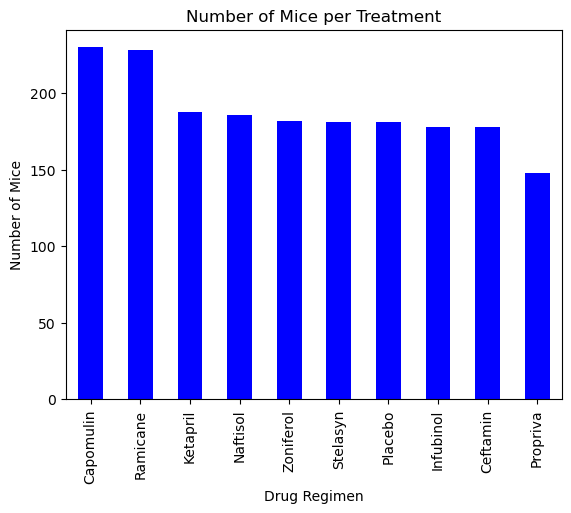

In [112]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plot_pandas = mice_count.plot.bar(color='b')  
# Set the xlabel, ylabel, and title using class methods
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Treatment")

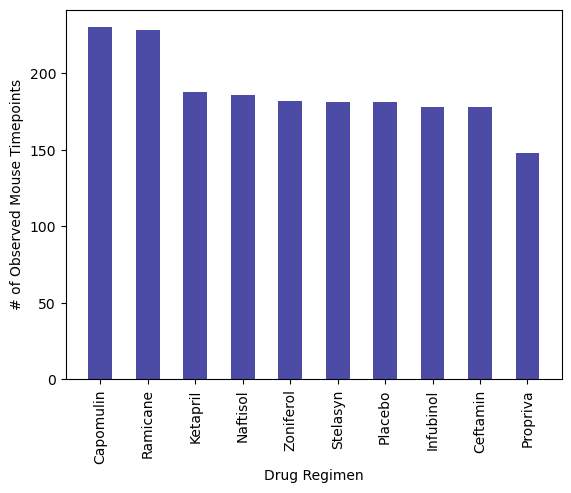

In [113]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mice_count.index.values
y_axis = mice_count.values

# Create a Pyplot bar plot based off of the group series from before and label the title
plt.bar(x_axis, y_axis, color='navy', alpha= 0.7, align='center', width = 0.5)

# Set the xlabel and ylabel, title using class methods
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")

plt.show()

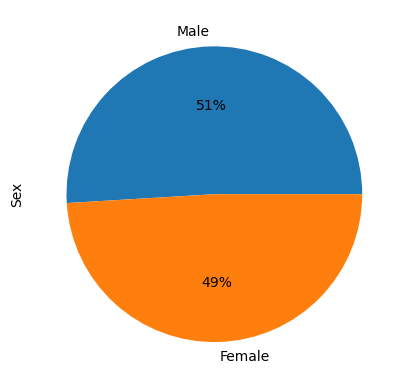

In [114]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
female_vs_male = clean_combine_data['Sex'].value_counts()
Sex = ['Male', 'Female']
female_vs_male.plot(kind = 'pie', autopct= '%1.0f%%', ylabel = 'Sex')
plt.show()

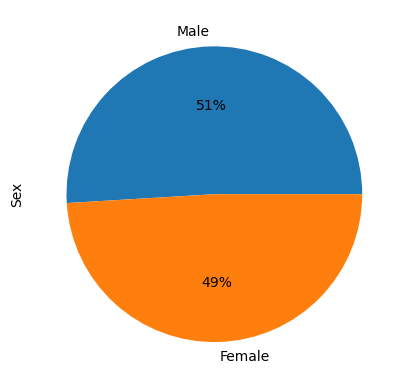

In [115]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_label = female_vs_male.index.values
count_value = female_vs_male.values
plt.ylabel('Sex')
plt.pie(count_value, labels = sex_label, autopct= '%1.0f%%')
plt.show()

## Quartiles, Outliers and Boxplots

In [116]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_tumor_volume_data = clean_combine_data.loc[(clean_combine_data['Drug Regimen'] == 'Capomulin') | (clean_combine_data['Drug Regimen'] == 'Ramicane') | (clean_combine_data['Drug Regimen'] == 'Infubinol') | (clean_combine_data['Drug Regimen'] == 'Ceftamin')]

# Start by getting the last (greatest) timepoint for each mouse

last_great_timepoint = final_tumor_volume_data.groupby(['Drug Regimen', 'Mouse ID']).last()
new_last_great_timepoint = last_great_timepoint.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
reduced_last_great_timepoint = new_last_great_timepoint[['Drug Regimen', 'Tumor Volume (mm3)']]
reduced_last_great_timepoint

capomulin_data = reduced_last_great_timepoint.loc[reduced_last_great_timepoint['Drug Regimen'] == 'Capomulin']
capomulin_data

ramicane_data = reduced_last_great_timepoint.loc[reduced_last_great_timepoint['Drug Regimen'] == 'Ramicane']
ramicane_data

infubinol_data = reduced_last_great_timepoint.loc[reduced_last_great_timepoint['Drug Regimen'] == 'Infubinol']
infubinol_data

ceftamin_data = reduced_last_great_timepoint.loc[reduced_last_great_timepoint['Drug Regimen'] == 'Ceftamin']
ceftamin_data

new_data = pd.DataFrame({"Capomulin": capomulin_data["Tumor Volume (mm3)"],
         "Ramicane": ramicane_data["Tumor Volume (mm3)"],
          "Infubinol": infubinol_data["Tumor Volume (mm3)"],
          "Ceftamin": ceftamin_data["Tumor Volume (mm3)"]})

new_data

,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,NaN,NaN,NaN
1,38.939633,NaN,NaN,NaN
2,30.485985,NaN,NaN,NaN
3,37.074024,NaN,NaN,NaN
4,40.159220,NaN,NaN,NaN
...,...,...,...,...
95,NaN,30.276232,NaN,NaN
96,NaN,40.667713,NaN,NaN
97,NaN,43.166373,NaN,NaN
98,NaN,44.183451,NaN,NaN


In [117]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = []
for drug in reduced_last_great_timepoint['Drug Regimen']:
    if drug not in treatment:
        treatment.append(drug)
treatment

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []
upper_quartile_list = []
lower_quartile_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment:    
    quartiles = new_data[drug].quantile([.25,.5,.75])
    lower_quartile = quartiles[.25]
    upper_quartile = quartiles[.75]
    drug_inter_quartile = upper_quartile - lower_quartile
    
    upper_quartile_list.append(upper_quartile)
    lower_quartile_list.append(lower_quartile)
    print(f"Drug Inter Quartile for {drug}: {drug_inter_quartile}")
    print(f"Anything less than {drug}'s lower quartile which is {lower_quartile} is an outlier")
    print(f"Anything more than {drug}'s upper quartile which is {upper_quartile} is an outlier")
    
upper_quartile_list   
lower_quartile_list

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds
lower_bound = lower_quartile - (1.5 * drug_inter_quartile)
upper_bound = upper_quartile + (1.5 * drug_inter_quartile)

print()

Drug Inter Quartile for Capomulin: 7.781863460000004
Anything less than Capomulin's lower quartile which is 32.37735684 is an outlier
Anything more than Capomulin's upper quartile which is 40.1592203 is an outlier
Drug Inter Quartile for Ceftamin: 15.577752179999997
Anything less than Ceftamin's lower quartile which is 48.72207785 is an outlier
Anything more than Ceftamin's upper quartile which is 64.29983003 is an outlier
Drug Inter Quartile for Infubinol: 11.477135160000003
Anything less than Infubinol's lower quartile which is 54.04860769 is an outlier
Anything more than Infubinol's upper quartile which is 65.52574285 is an outlier
Drug Inter Quartile for Ramicane: 9.098536719999998
Anything less than Ramicane's lower quartile which is 31.56046955 is an outlier
Anything more than Ramicane's upper quartile which is 40.65900627 is an outlier



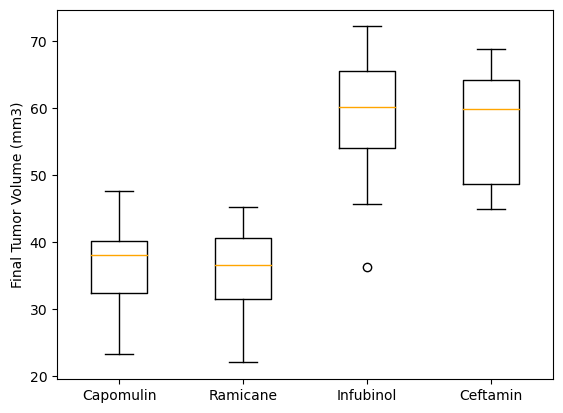

In [118]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplot = new_data.boxplot(grid = False, color = dict(boxes = 'k', whiskers='k', medians='orange'))
boxplot.set_ylabel('Final Tumor Volume (mm3)')
boxplot.set_xlabel('')
plt.show()

## Line and Scatter Plots

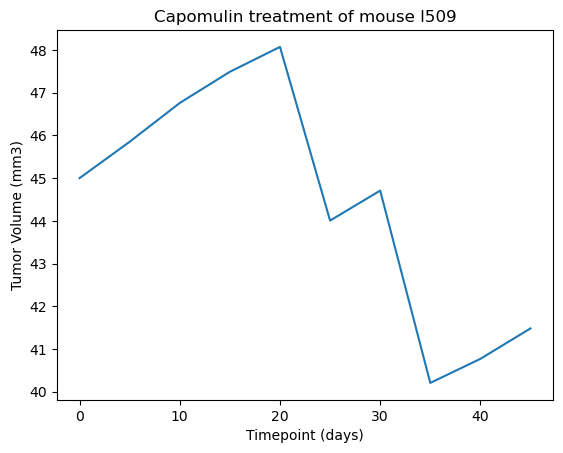

In [119]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

capomulin_data = clean_combine_data.loc[(clean_combine_data["Drug Regimen"] == "Capomulin") & (clean_combine_data["Mouse ID"] == "l509") ]
reduced_capomulin_data = capomulin_data[["Timepoint","Tumor Volume (mm3)" ]]
reduced_capomulin_data = reduced_capomulin_data.set_index(["Timepoint"])

#get values ready for plotting
timepoint = reduced_capomulin_data.index.values
tumor_volume = reduced_capomulin_data.values

#graph build and display
plt.plot(timepoint, tumor_volume)
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


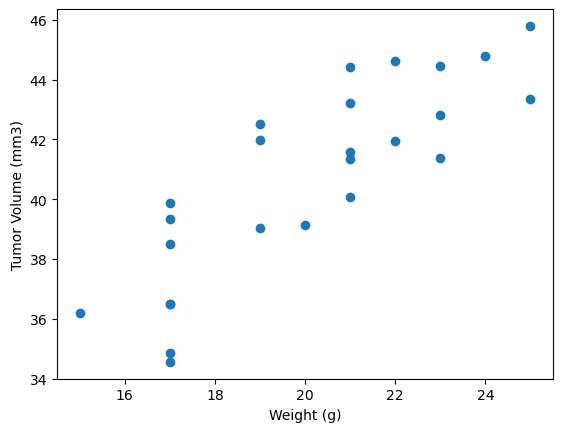

In [120]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

new_capomulin_data = clean_combine_data.loc[(clean_combine_data["Drug Regimen"] == "Capomulin")]
group_capomulin_data = new_capomulin_data.groupby("Mouse ID")

#find and store avg tumor vol for each weight
avg_tumor_vol = group_capomulin_data[("Tumor Volume (mm3)")].mean()
weight = group_capomulin_data["Weight (g)"].mean()
avg_capomulin_data = pd.DataFrame({"Weight (g)": weight, "Tumor Volume (mm3)": avg_tumor_vol})

#graph build and display
plt.scatter(weight, avg_tumor_vol)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


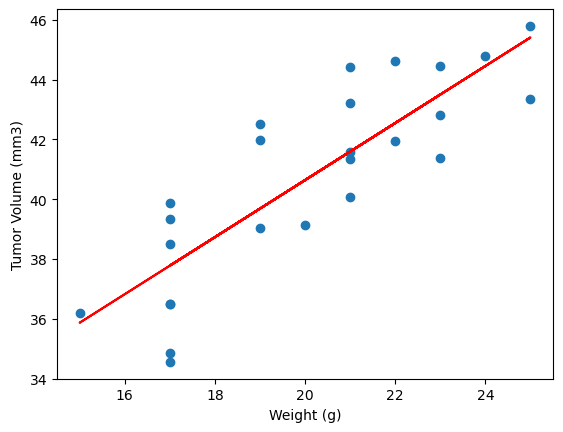

In [121]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr (weight,avg_tumor_vol )

print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

x_values=avg_capomulin_data["Weight (g)"]
y_values=avg_capomulin_data["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, avg_tumor_vol)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()
